# Session 6: Metrics & Losses

You need to read the theory lectures before practicing with this notebook:
- [Preclass S6](https://hackmd.io/@KylePaul/ML_Preclass_S6)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S6)

```{contents}

```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/fashion_data.zip" -d "/content"

## Custom `DataLoader`

(28, 28)


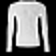

In [15]:
from PIL import Image
import os
import numpy as np

image = Image.open("/content/data/train/2/1001.png")
print(image.size)
image = image.resize((image.width*2, image.height*2))
image

### Create Path

#### Breakdown of code

In [22]:
# View subfolders in train folder
dir = '/content/data/train'
folders = os.listdir(dir)
folders

['2', '8', '1', '7', '5', '0', '4', '3', '9', '6']

In [24]:
# access to folders and image names
folder_path = os.path.join(dir, folders[0])
image_names = os.listdir(folder_path)
image_names[:10]

['3841.png',
 '7745.png',
 '793.png',
 '24082.png',
 '16689.png',
 '34190.png',
 '55052.png',
 '45270.png',
 '51924.png',
 '52590.png']

In [30]:
# connect the folder path with the image name using loop
image_paths = []
temp = []
for image_name in image_names:
  temp.append(os.path.join(folder_path, image_name))
image_paths.extend(temp)
image_paths[:10]

['/content/data/train/2/3841.png',
 '/content/data/train/2/7745.png',
 '/content/data/train/2/793.png',
 '/content/data/train/2/24082.png',
 '/content/data/train/2/16689.png',
 '/content/data/train/2/34190.png',
 '/content/data/train/2/55052.png',
 '/content/data/train/2/45270.png',
 '/content/data/train/2/51924.png',
 '/content/data/train/2/52590.png']

In [31]:
# connect the folder path with the image using list comprehension
image_paths.extend([os.path.join(folder_path, image_name) for image_name in image_names])
image_paths[:10]

['/content/data/train/2/3841.png',
 '/content/data/train/2/7745.png',
 '/content/data/train/2/793.png',
 '/content/data/train/2/24082.png',
 '/content/data/train/2/16689.png',
 '/content/data/train/2/34190.png',
 '/content/data/train/2/55052.png',
 '/content/data/train/2/45270.png',
 '/content/data/train/2/51924.png',
 '/content/data/train/2/52590.png']

In [33]:
labels = []
# string type -> int type
list_label = [int(folders[0])] * len(image_names)
labels.extend(list_label)  # extend: add a list to another list
labels[:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

#### Collect into 1 cell code

In [38]:
dir = '/content/data/train'
image_paths = []
labels = []
for folder in os.listdir(dir):
  folder_path = os.path.join(dir, folder)
  image_names = os.listdir(folder_path)
  image_paths.extend([os.path.join(folder_path, image_name) for image_name in image_names])
  labels.extend([int(folder)] * len(image_names))

#### View the result

In [45]:
image_paths[6000:6010]

['/content/data/train/8/9187.png',
 '/content/data/train/8/53578.png',
 '/content/data/train/8/8960.png',
 '/content/data/train/8/26191.png',
 '/content/data/train/8/49778.png',
 '/content/data/train/8/49695.png',
 '/content/data/train/8/41676.png',
 '/content/data/train/8/51462.png',
 '/content/data/train/8/22633.png',
 '/content/data/train/8/27530.png']

In [46]:
labels[6000:6010]

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

### Main class for data logger

Let's see the overal structure of our class

Note: method with format `__method__` is required, with `_method` means you only should use inside the class and `method` means you can call it from the outside

In [ ]:
import tensorflow as tf
class FashionDataset(tf.keras.utils.Sequence):
  # three methods __init__, __getiteem__, __len__ should be implemented
  def __init__(self, root_dir, batch_size=32):
    pass
  def _get_all_paths_and_labels(self, dir):
    pass
  def on_epoch_end(self):
    pass
  def __getitem__(self):
    pass
  def get_input_path(self, start, end):
    pass
  def get_output_batch(self, start, end):
    pass
  def __len__(self):
    pass

In [59]:
import tensorflow as tf
class FashionDataset(tf.keras.utils.Sequence):
  # three methods __init__, __getiteem__, __len__ should be implemented
  def __init__(self, root_dir, batch_size=32):
    self.image_paths, self.labels, self.num_classes = self._get_all_paths_and_labels(root_dir)
    self.batch_size = batch_size
    self.num_samples = len(self.labels)
    self.length = self.num_samples // self.batch_size  # training step

  def _get_all_paths_and_labels(self, dir):
    image_paths = []
    labels = []
    num_classes = len(os.listdir(dir))
    for folder in os.listdir(dir):
      folder_path = os.path.join(dir, folder)
      image_names = os.listdir(folder_path)
      image_paths.extend([os.path.join(folder_path, image_name) for image_name in image_names])
      labels.extend([int(folder)] * len(image_names))
    image_paths = np.array(image_paths)
    labels = np.array(labels)
    return image_paths, labels, num_classes

  def on_epoch_end(self):
    pass

  def __getitem__(self, index):
    start_index = index * self.batch_size
    end_index = start_index + self.batch_size
    inputs = self._get_input_batch(start_index, end_index)
    outputs = self._get_output_batch(start_index, end_index)
    return inputs, outputs

  def _get_input_batch(self, start, end):
    inputs = []
    for path in self.image_paths[start:end]:
      pil_image = Image.open(path)
      image = np.array(pil_image)
      image = image.flatten()
      inputs.append(image)
    inputs = np.array(inputs)
    inputs = inputs / 255.0  # normalize
    return inputs

  def _get_output_batch(self, start, end):
    outputs = self.labels[start:end]
    outputs = tf.keras.utils.to_categorical(outputs, self.num_classes) # one-hot-encoding
    return outputs

  def __len__(self):
    return self.length

In [60]:
train_dataset = FashionDataset("/content/data/train", batch_size=32)
x, y = train_dataset[0]
print(x.shape)
print(y.shape)

(32, 784)
(32, 10)


Now you can either use the available training loop with this mlp architecture or you can customize the training loop by youself

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session

clear_session()
set_seed(42)
np.random.seed(42)

# YOUR CODE HERE
model = Sequential()
# input layer
model.add(Input(shape=(x.shape[1:])))
# mlp
model.add(Dense(32, activation='relu', name='layer_1'))
model.add(Dense(64, activation='relu', name='layer_2'))
model.add(Dense(128, activation='relu', name='layer_3'))
model.add(Dense(64, activation='relu', name='layer_4'))
model.add(Dense(32, activation='relu', name='layer_5'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 32)                25120     
                                                                 
 layer_2 (Dense)             (None, 64)                2112      
                                                                 
 layer_3 (Dense)             (None, 128)               8320      
                                                                 
 layer_4 (Dense)             (None, 64)                8256      
                                                                 
 layer_5 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 46,218
Trainable params: 46,218
Non-traina

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 22s 10ms/step - loss: 0.4907 - accuracy: 0.8140
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4389 - accuracy: 0.8345
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4127 - accuracy: 0.8445
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3901 - accuracy: 0.8519
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3854 - accuracy: 0.8551


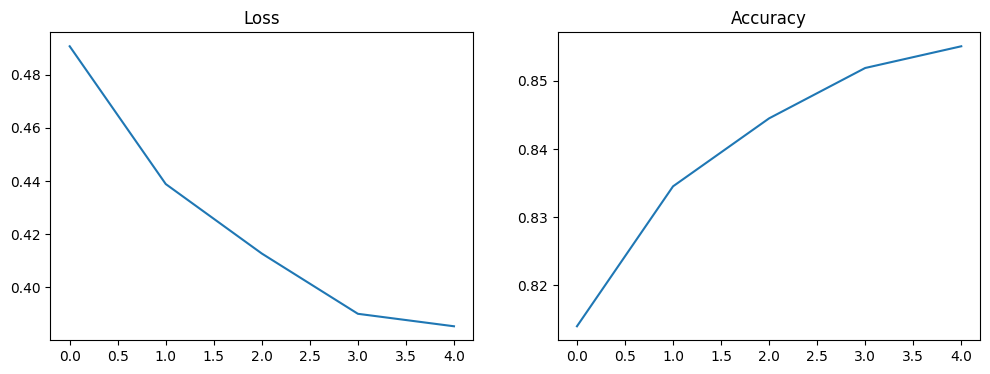

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()

## Custom Training Loops

In [68]:
from tqdm import tqdm # for progress bar

# Create a Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# set the hyperparameters
epochs = 10
loss_func = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# for calculating the mean
mean_loss = tf.keras.metrics.Mean()
mean_accuracy = tf.keras.metrics.Mean()
accuracy = tf.keras.metrics.CategoricalAccuracy()

his_loss = {}
his_accuracy = {}
# training loops (feed forward and backpropagation)
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}:")
  for step in range(len(train_dataset)):
    # 1. Get data
    x, y = train_dataset[step]

    # 2. Neural networks
    with tf.GradientTape() as tape:
      # 2.1 Feed forward
      preds = model(x)
      loss = loss_func(y, preds)
      # 2.2 Backpropation
      grads = tape.gradient(loss, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # 3. Store the metric
    mean_loss.update_state(loss)
    mean_accuracy.update_state(accuracy(y, preds))

  print(f"    Avg loss: {mean_loss.result().numpy()}")
  print(f"    Avg accuracy: {mean_accuracy.result().numpy()}")
  his_loss[epoch] = mean_loss.result().numpy()
  his_accuracy[epoch] = mean_accuracy.result().numpy()
  mean_loss.reset_state()
  mean_accuracy.reset_state()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0:


 10%|█         | 1/10 [00:38<05:47, 38.63s/it]

    Avg loss: 0.6363075375556946
    Avg accuracy: 0.9368966817855835
Epoch 1:


 20%|██        | 2/10 [01:16<05:07, 38.43s/it]

    Avg loss: 0.5718590021133423
    Avg accuracy: 0.9366992115974426
Epoch 2:


 30%|███       | 3/10 [01:54<04:24, 37.83s/it]

    Avg loss: 0.3835413157939911
    Avg accuracy: 0.9407686591148376
Epoch 3:


 40%|████      | 4/10 [02:33<03:50, 38.35s/it]

    Avg loss: 0.3060646951198578
    Avg accuracy: 0.9453691840171814
Epoch 4:


 50%|█████     | 5/10 [03:11<03:11, 38.28s/it]

    Avg loss: 0.30652278661727905
    Avg accuracy: 0.948620080947876
Epoch 5:


 60%|██████    | 6/10 [03:49<02:32, 38.24s/it]

    Avg loss: 0.3172031342983246
    Avg accuracy: 0.9508426785469055
Epoch 6:


 70%|███████   | 7/10 [04:28<01:55, 38.42s/it]

    Avg loss: 0.3223407566547394
    Avg accuracy: 0.9524418711662292
Epoch 7:


 80%|████████  | 8/10 [05:07<01:17, 38.57s/it]

    Avg loss: 0.3202023506164551
    Avg accuracy: 0.9536822438240051
Epoch 8:


 90%|█████████ | 9/10 [05:45<00:38, 38.36s/it]

    Avg loss: 0.3167265057563782
    Avg accuracy: 0.9547190070152283
Epoch 9:


100%|██████████| 10/10 [06:23<00:00, 38.36s/it]

    Avg loss: 0.3130231201648712
    Avg accuracy: 0.9556078314781189


### Visualize

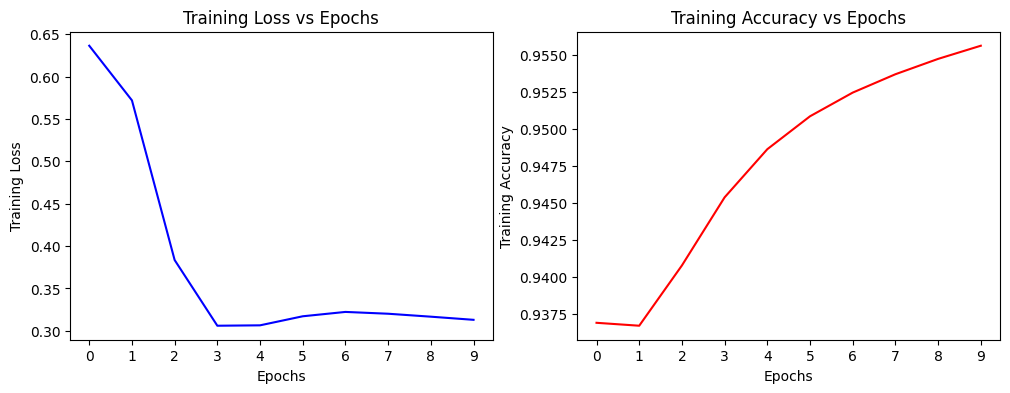

In [77]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(his_loss.keys(), his_loss.values(), color='blue')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.xticks(list(his_loss.keys()))

plt.subplot(1,2,2)
plt.plot(his_accuracy.keys(), his_accuracy.values(), color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.xticks(list(his_accuracy.keys()))

plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax'))

epochs = 1
loss_func = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
# for calculate mean
mean_loss = tf.keras.metrics.Mean()
mean_accuracy = tf.keras.metrics.Mean()
accuracy = tf.keras.metrics.CategoricalAccuracy()

# tqdm progress bar
for epoch in range(epochs):
  print(f"Epoch {epoch}:")
  for step in range(len(train_dataset)):
    ## Get data
    x, y = train_dataset[step]
    with tf.GradientTape() as tape:
    ## Get prediction
      preds = model(x)
    ## Calculate loss
      loss = loss_func(y, preds)
    ## Calculate gradients
      grads = tape.gradient(loss, model.trainable_weights)
    ## Update weight
      optimizer.apply_gradients(zip(grads, model.trainable_weights))
    ## Calculate metric
    mean_loss.update_state(loss)
    mean_accuracy.update_state(accuracy(y, preds))
  print(f"    Avg loss: {mean_loss.result().numpy()}")
  print(f"    Avg accuracy: {mean_accuracy.result().numpy()}")
  mean_loss.reset_state()
  mean_accuracy.reset_state()

Epoch 0:
    Avg loss: 0.59450763463974
    Avg accuracy: 0.7385523319244385


In [78]:
def inference_path(image_path):
  pil_image = Image.open(image_path)
  # resize if need
  image = np.array(pil_image)
  image = image.flatten()
  image = image / 255
  image = np.expand_dims(image, axis=0) # batch == 1
  pred = model.predict(image)
  pred_class = np.argmax(pred, axis=-1)[0]
  return pred_class

inference_path("/content/data/train/0/1.png")

1/1 [==============================] - 0s 81ms/step


6